# Titanic Dataset Columns Description 🚢

- **PassengerId** 🆔: Unique passenger identifier (int).  
- **Survived** ❤️‍🔥: Survival (0 = No, 1 = Yes).  
- **Pclass** 🎟️: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).  
- **Name** 📝: Full name including title.  
- **Sex** 👨‍👩‍👧: Gender (male/female).  
- **Age** 🎂: Age in years (float, may contain NaN).  
- **SibSp** 👨‍👩‍👧‍👦: Number of siblings/spouses aboard.  
- **Parch** 👶👵: Number of parents/children aboard.  
- **Ticket** 🎫: Ticket number (string, many unique values).  
- **Fare** 💰: Passenger fare (float).  
- **Cabin** 🛌: Cabin number (string, ~78% missing).  
- **Embarked** ⚓: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).  


# Data Preparation


In [783]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [784]:
# -------------------------------
# Global settings for high-quality plots
# -------------------------------

# High-resolution plots
%matplotlib inline
plt.rcParams['figure.dpi'] = 125           # висока роздільна здатність
plt.rcParams['savefig.dpi'] = 300           # висока якість при збереженні
plt.rcParams['figure.figsize'] = (8,5)     # стандартний розмір
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn style
sns.set(style='whitegrid')
sns.set_palette('Paired')  # глобальна палітра



In [785]:
PALETTE = sns.color_palette('Paired')    # глобальна палітра для всіх графіків
sns.set_palette(PALETTE)

In [786]:
import warnings
warnings.filterwarnings('ignore')

In [787]:
df = pd.read_csv('./Titanic-Dataset.csv')

In [788]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [789]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [790]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [791]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [792]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [793]:
df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [794]:
df.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [795]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [796]:
df[df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [797]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [798]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [799]:
cat_cols = ['PassengerId', 'Name', 'Cabin','Embarked', 'Sex', 'Ticket']
df_cat_cols = df[cat_cols]
df_cat_cols.head()

,PassengerId,Name,Cabin,Embarked,Sex,Ticket
0,1,"Braund, Mr. Owen Harris",NaN,S,male,A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85,C,female,PC 17599
2,3,"Heikkinen, Miss. Laina",NaN,S,female,STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123,S,female,113803
4,5,"Allen, Mr. William Henry",NaN,S,male,373450


In [800]:
num_cols = df.drop(cat_cols, axis=1)

In [801]:
num_cols.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [802]:
num_cols.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,29.737705,0.553734,0.329690,22.117887
1,1.950292,28.108684,0.473684,0.464912,48.395408


In [803]:
top5_fare_expensive = df.sort_values(by='Fare', ascending=False).head(5)
top5_fare_expensive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [804]:
# df[df['Fare'] == df['Fare'].min()]
top5_fare_cheap = df.sort_values(by='Fare', ascending=True).head(5)
top5_fare_cheap

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,40.0,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.0,0,0,239853,0.0,NaN,S


# Vizualization data

Text(0.5, 1.0, 'Passenger Distribution by Sex')

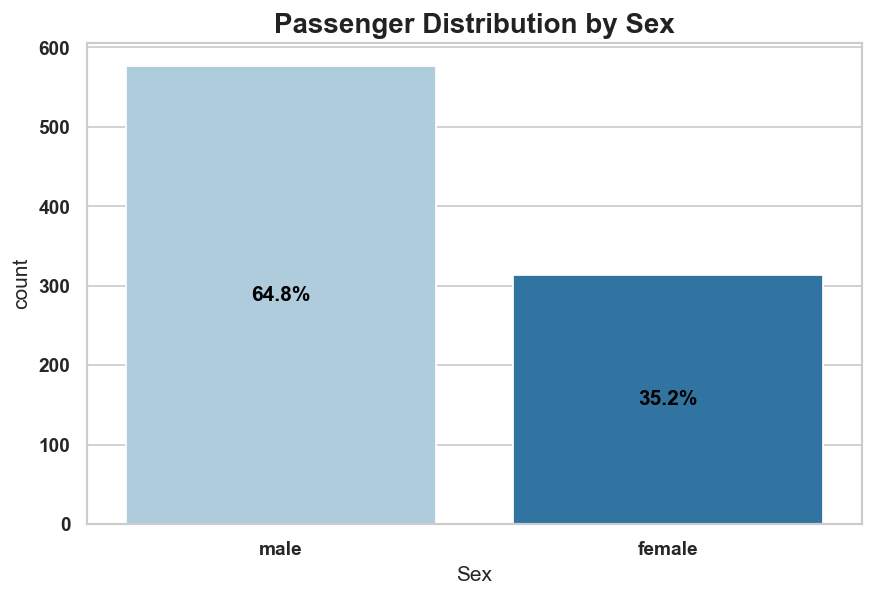

In [805]:
ax = sns.countplot(data=df, x='Sex', palette=PALETTE)  # використання глобальної палітри

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height()/2,
        f'{100*bar.get_height()/len(df):.1f}%',
        ha='center', va='center',
        color='black', weight='bold'
    )

# Додаємо заголовок
ax.set_title('Passenger Distribution by Sex', fontsize=16, weight='bold', color='#222222')


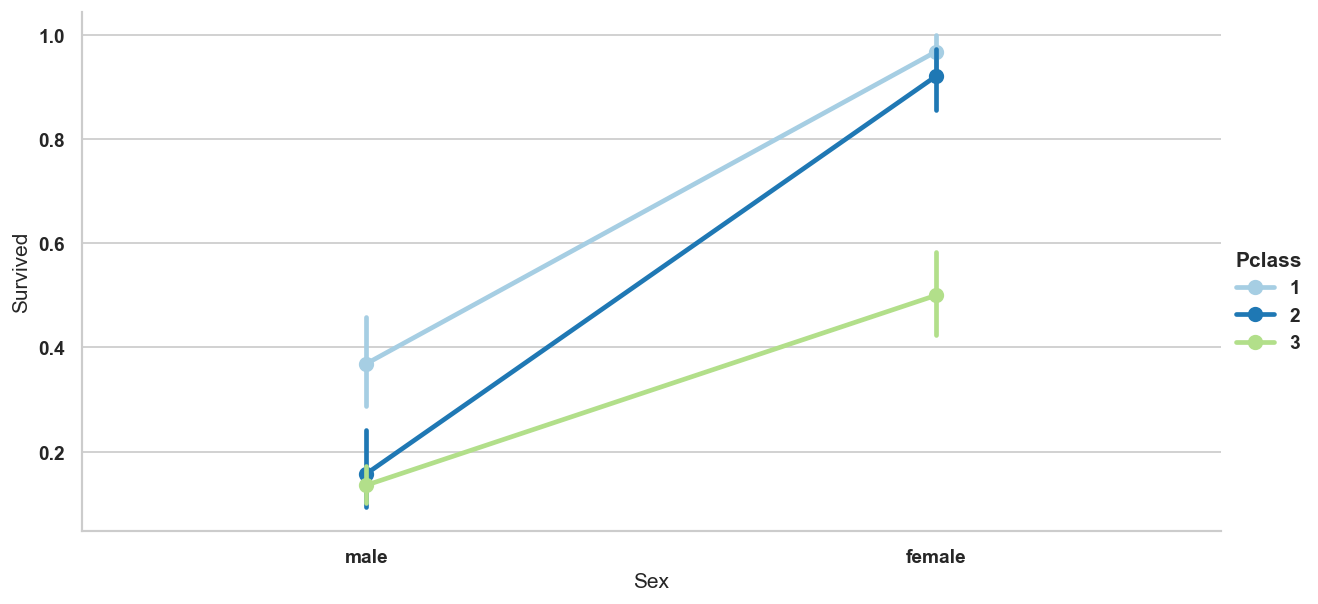

In [806]:
sns.catplot(data=df, x='Sex', y='Survived', hue='Pclass', kind='point', palette=PALETTE, aspect=2)

In [807]:
import plotly.graph_objects as go

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18','18-25','25-35','35-45','45-55','55-65','65-100']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Підрахунок кількості пасажирів у кожній групі
age_counts = df['Age_group'].value_counts().sort_index()

# Funnel chart
fig = go.Figure(go.Funnel(
    y = age_counts.index,
    x = age_counts.values,
    textinfo = "value",
    textposition = "inside",
    hoverinfo = "y+x",
    marker = {"color": ["#4E79A7", "#F28E2B", "#59A14F", "#E15759", "#76B7B2", "#EDC948", "#B07AA1"]}
))

# Заголовок по центру
fig.update_layout(
    title={
        'text': "Titanic Passenger Funnel by Age Group",
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=35, family="Arial", color="#222222", weight='bold')
    },
    font=dict(size=14)
)

fig.show()


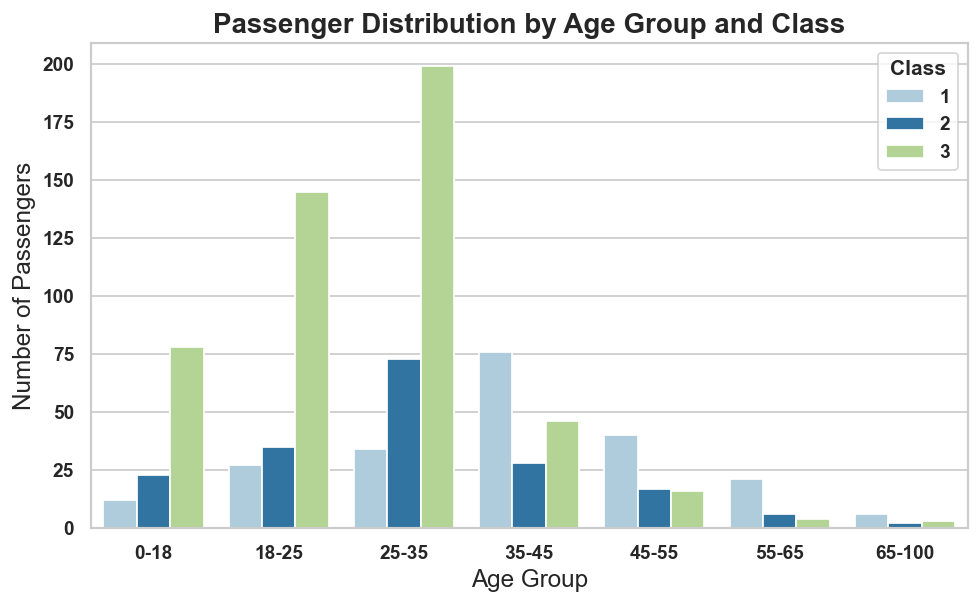

In [808]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_group', hue='Pclass', palette=PALETTE)

plt.title('Passenger Distribution by Age Group and Class', fontsize=16, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

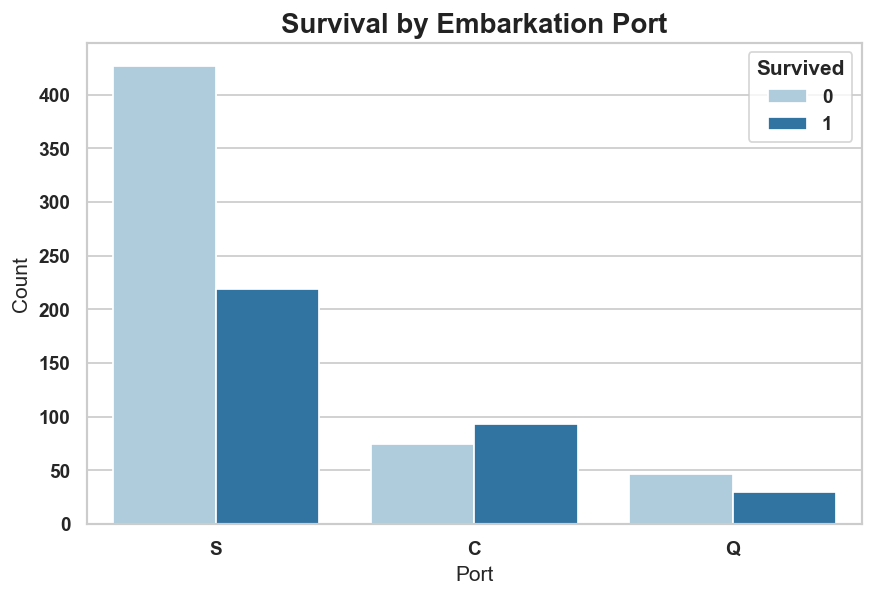

In [809]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Embarked', hue='Survived', palette=PALETTE)
plt.title('Survival by Embarkation Port', fontsize=16, weight='bold', color='#222222')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

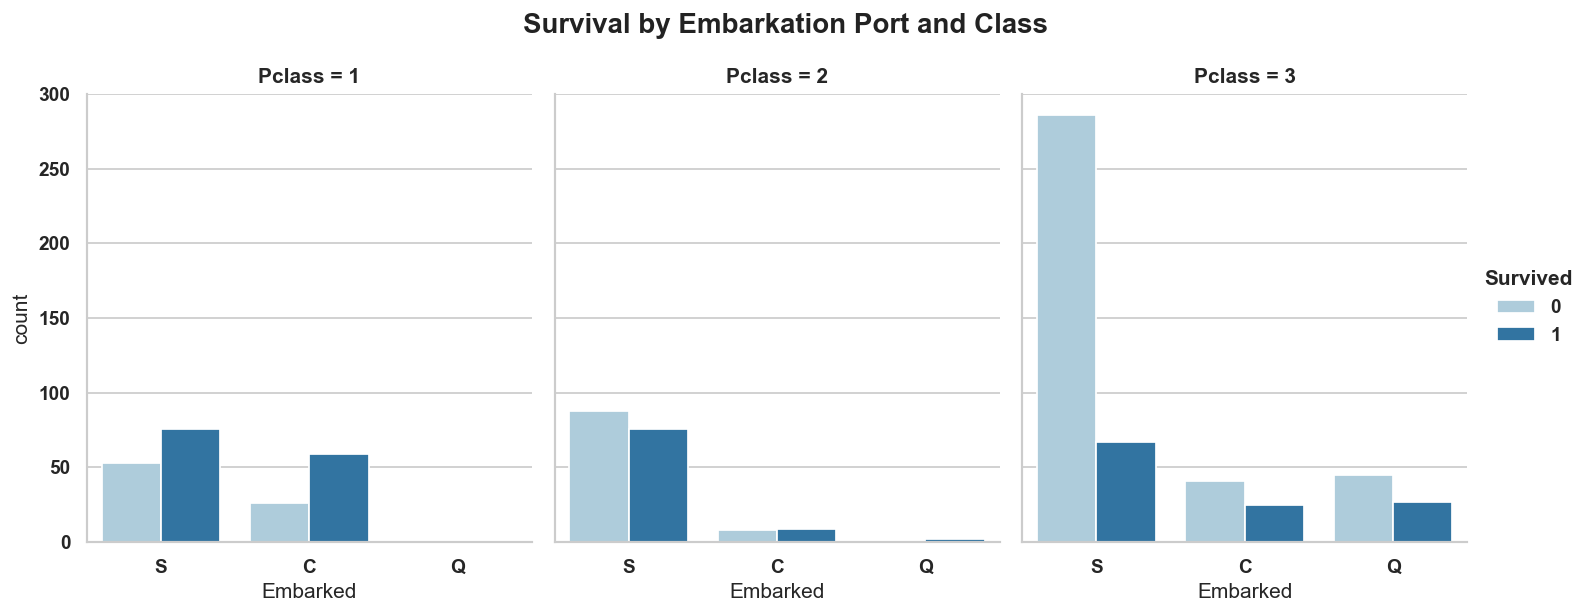

In [810]:
# Survival by Embarkation Port and Class
sns.catplot(
    data=df,
    x='Embarked',
    hue='Survived',
    col='Pclass',          # окремо по класам
    kind='count',
    palette=PALETTE,
    height=5,
    aspect=0.8
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Embarkation Port and Class', fontsize=16, weight='bold', color='#222222')
plt.show()


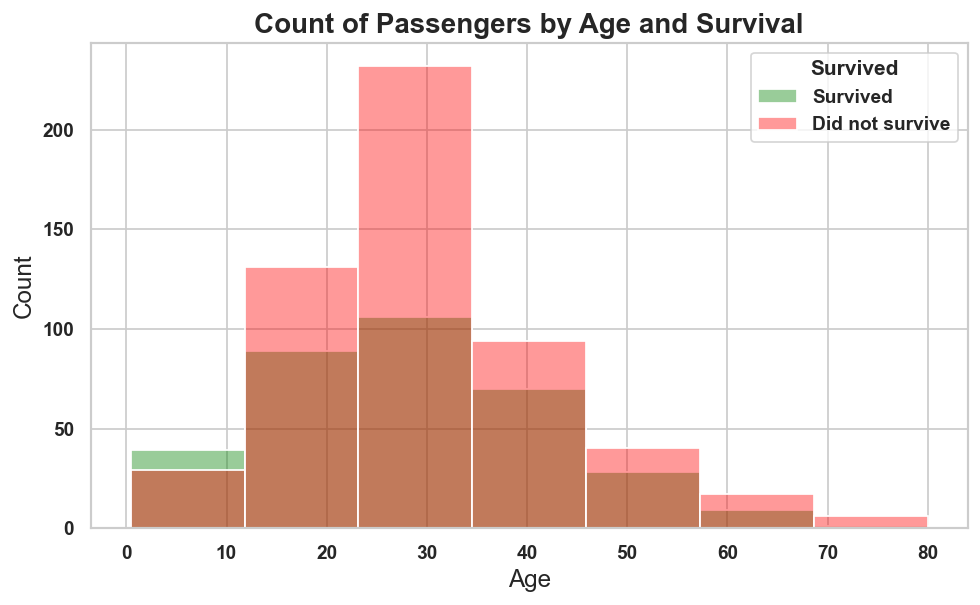

In [811]:
plt.figure(figsize=(8,5))

# Гістограма по віку з накладанням
sns.histplot(
    data=df,
    x='Age',
    hue='Survived',
    multiple='layer',        # накладання, а не стек
    palette={0:'red', 1:'green'},
    bins=7,
    alpha=0.4                # прозорість, щоб було видно обидві категорії
)

plt.title('Count of Passengers by Age and Survival', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['Survived','Did not survive',])
plt.tight_layout()
plt.show()


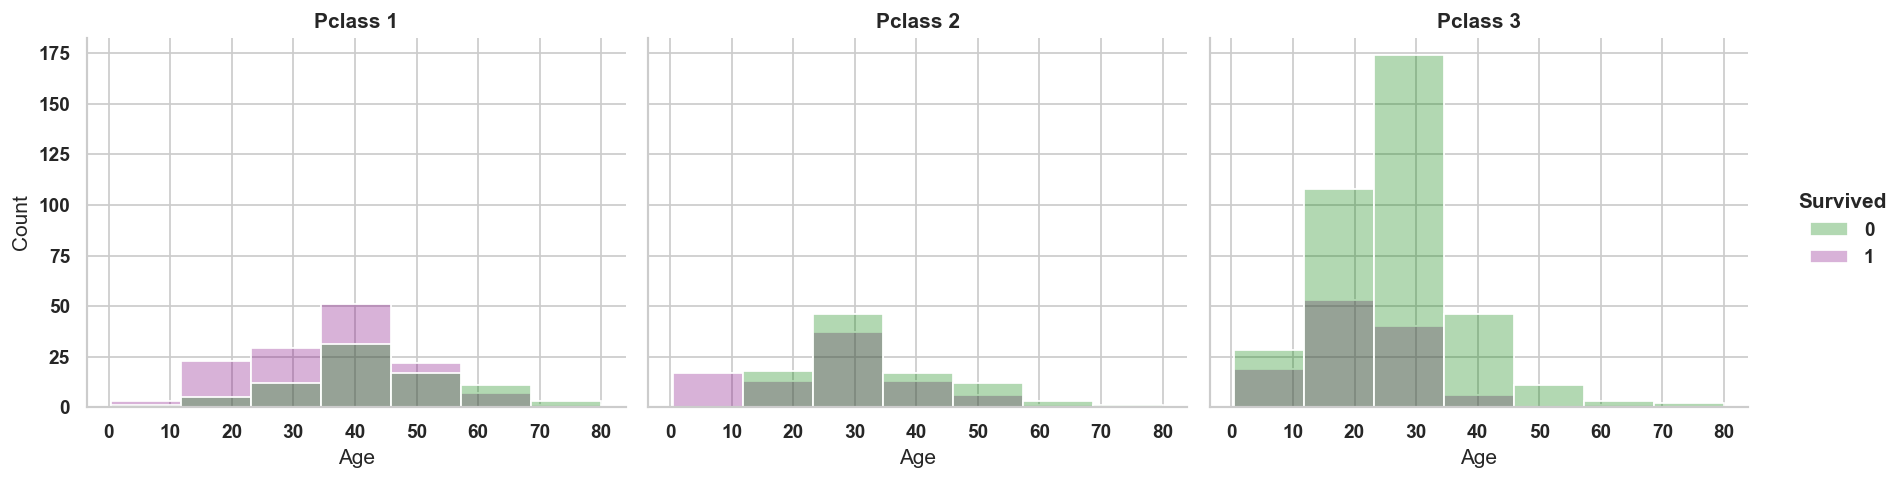

In [812]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гістограма по віку з розбиттям на класи
g = sns.displot(
    data=df,
    x='Age',
    hue='Survived',
    col='Pclass',
    multiple='layer',          # накладання
    palette={0:'green', 1:'purple'},
    bins=7,
    alpha=0.3,
    height=4,
    aspect=1.2
)

g.set_axis_labels("Age", "Count")
g.set_titles("Pclass {col_name}")
g._legend.set_title("Survived")
g._legend.set_bbox_to_anchor((1, 0.5))  # можна відрегулювати позицію легенди
plt.show()


# Analyse Family 

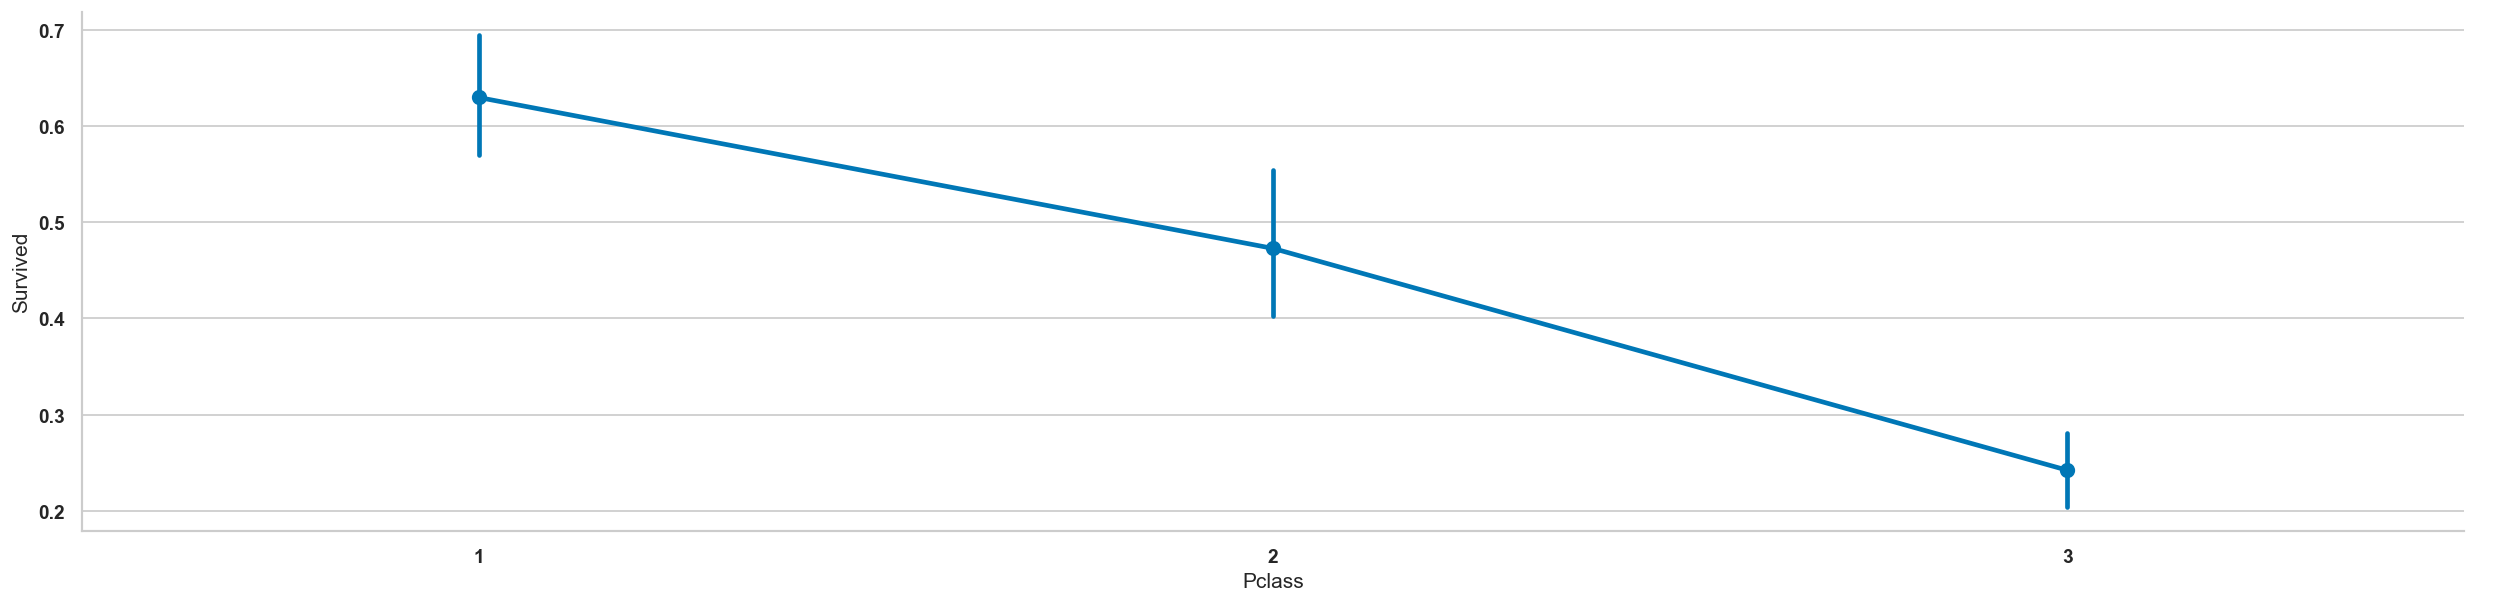

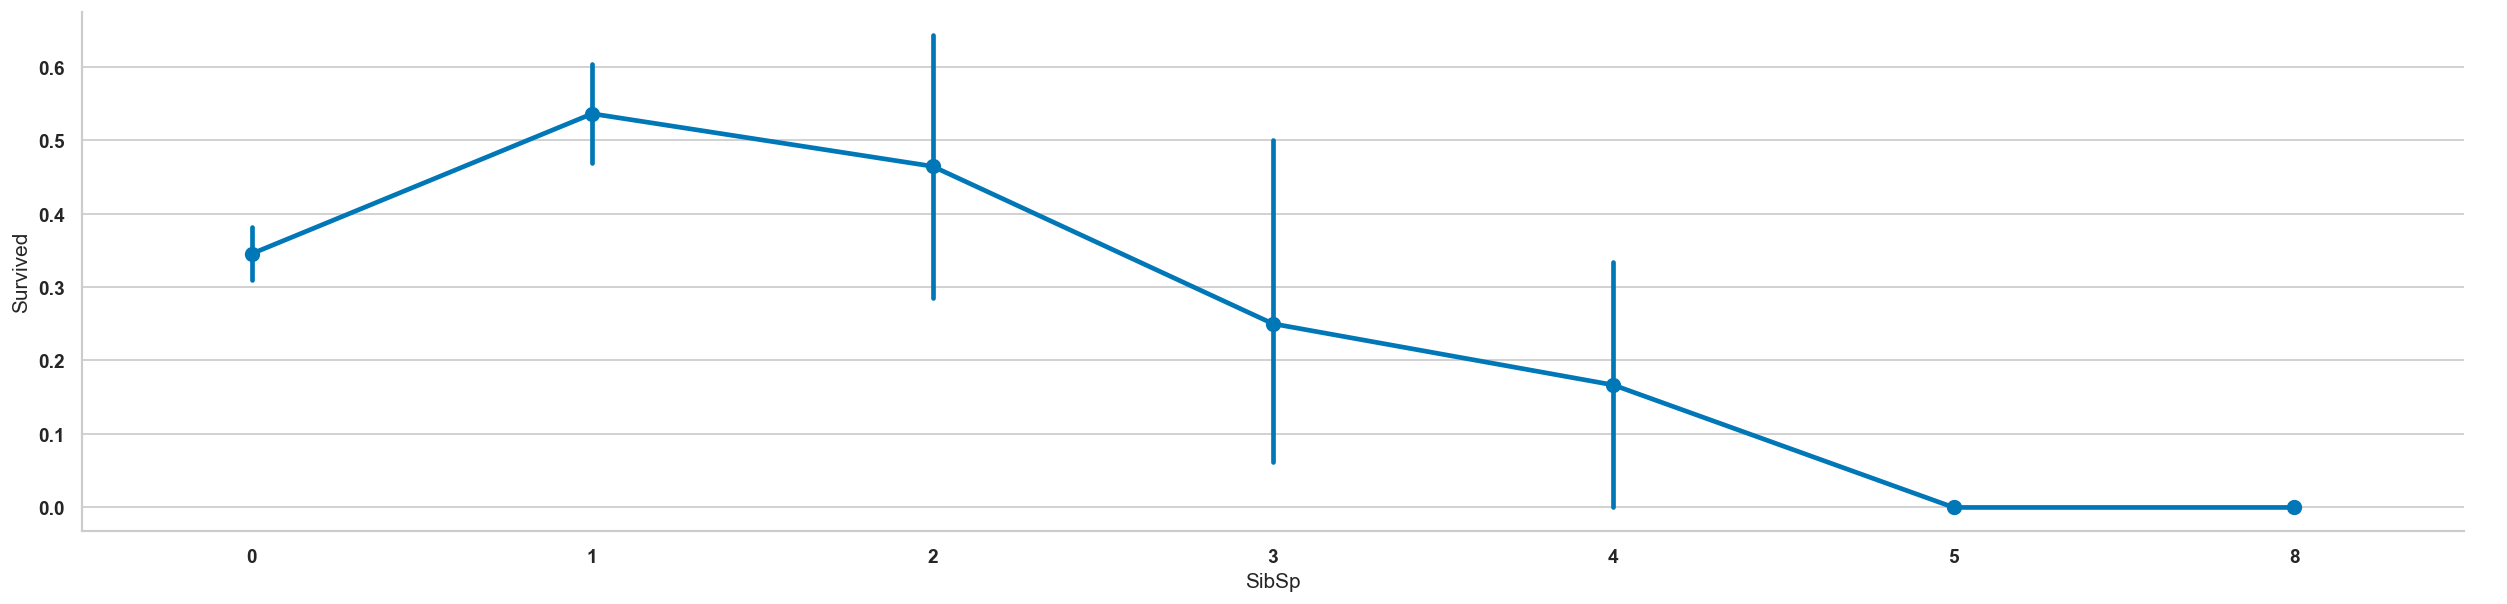

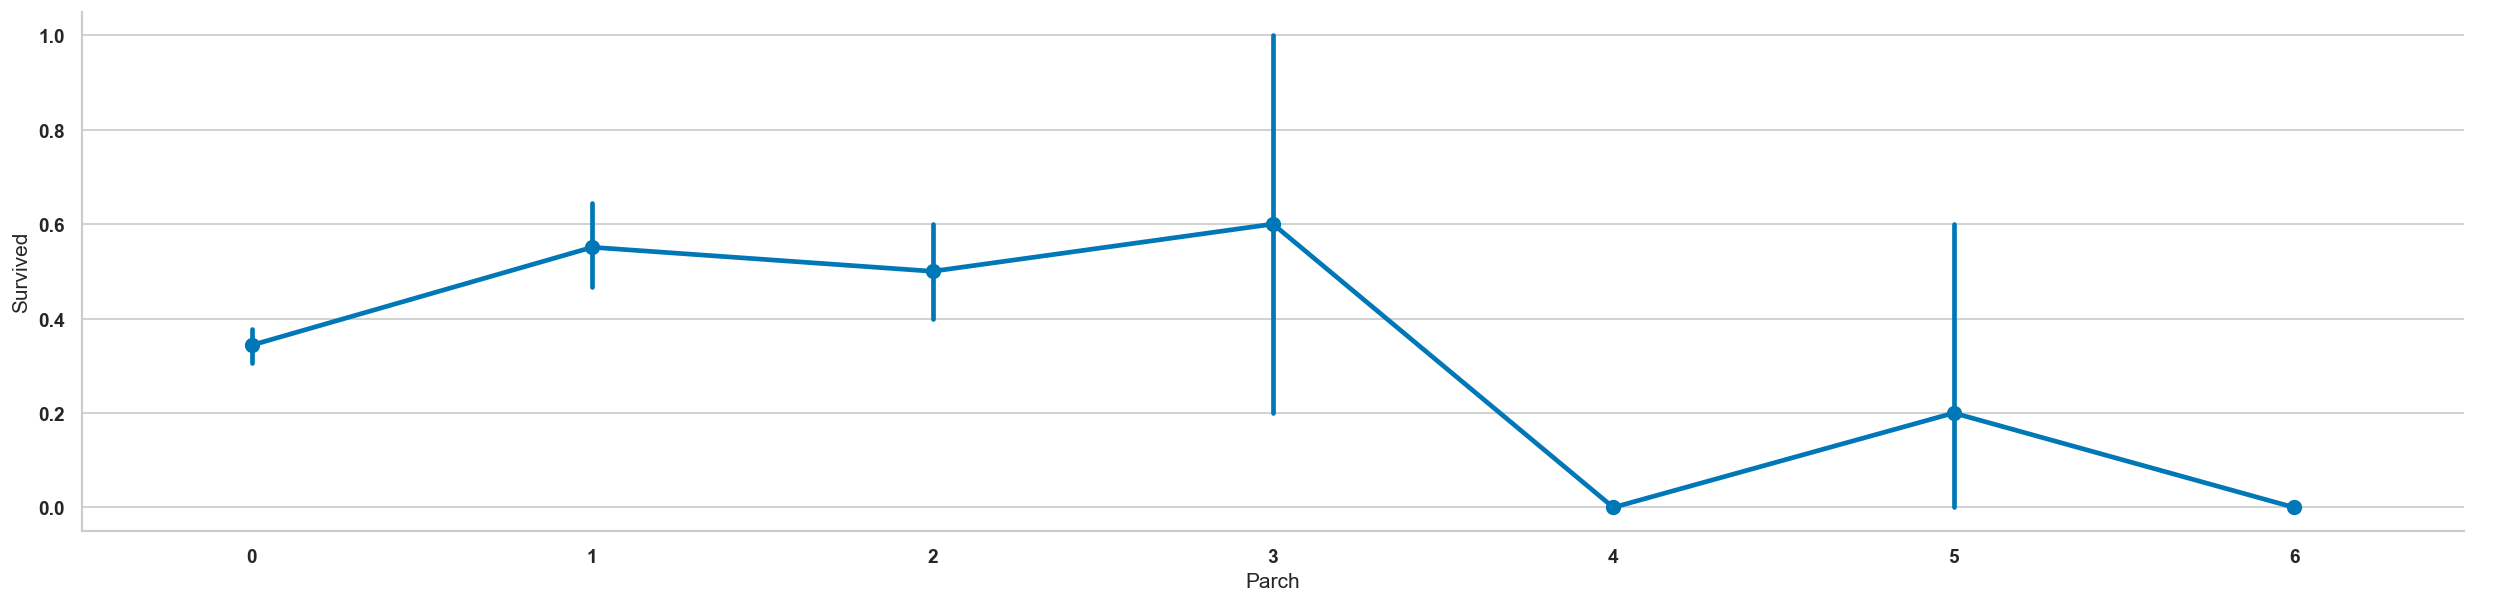

In [813]:
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(
        x=col,
        y="Survived",
        data=num_cols,
        kind='point',  # лінія середнього
        aspect=4,
        color='#0077b6'
    
    )


In [814]:
df['Family'] = df['SibSp'] + df['Parch']
df = df.drop(['Parch', 'SibSp'], axis=1)

In [815]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Age_group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,18-25,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,35-45,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,25-35,0


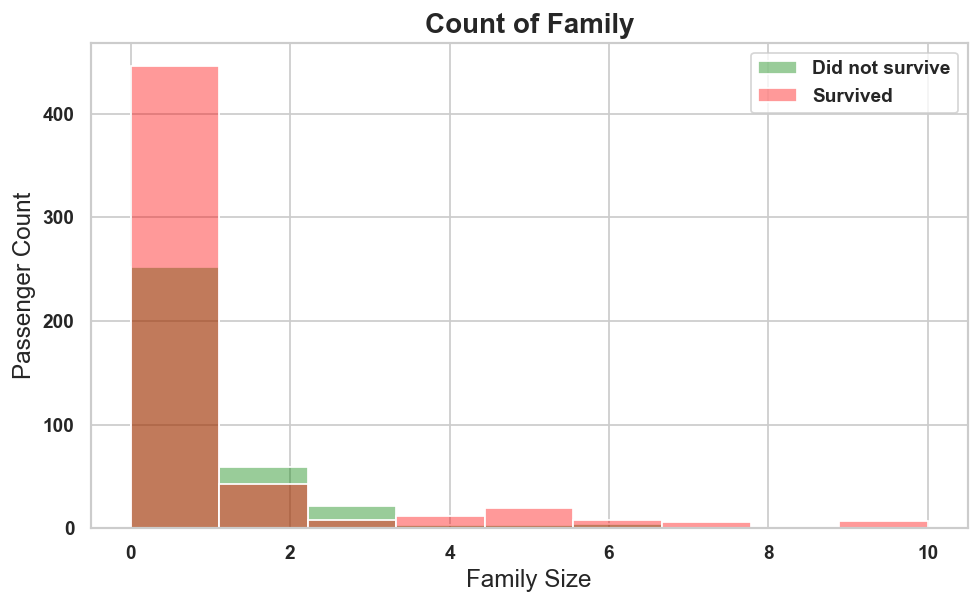

In [816]:
plt.figure(figsize=(8,5))

# Гістограма кількості пасажирів у залежності від розміру сім'ї
sns.histplot(
    data=df,
    x='Family',
    hue='Survived',
    multiple='layer',        # накладання гістограм, а не складання
    palette={0:'red', 1:'green'},
    bins=9,
    alpha=0.4                # прозорість, щоб було видно перекриття
)

plt.title('Count of Family', fontsize=16, weight='bold')
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Passenger Count', fontsize=14)
plt.legend(labels=['Did not survive','Survived'])
plt.tight_layout()
plt.show()


# Titanic Dataset Analysis

##  Data Preprocessing
- Missing values in **Age** were replaced with the **median**.  
- Missing values in **Embarked** were replaced with the **mode**.  
- **Cabin** column was not modified.  
- Created **cat_cols** for categorical columns and **num_cols** for numerical columns.  

---

##  Conclusions
- **Gender effect:** Females had a higher chance of survival than males.  
- **Class effect:** Passengers in 1st class were more likely to survive than those in 2nd or 3rd class.  
- **Age effect:** Younger passengers, especially children, had higher survival rates.  
- **Port of Embarkation:** Most passengers boarded from port 'S'; the port had a minor influence on survival.  
- **Cabin information:** A large number of missing values in `Cabin` makes it hard to analyze; could consider using it as a separate feature indicating missingness.  
- Overall, survival was influenced strongly by **sex, class, and age**, with other features playing a smaller role.
